In [ ]:
#Importing the header files
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#Defining the image and batch size
IMG_SIZE= 224
BATCH_SIZE= 32

In [ ]:
train_datagen= ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [ ]:
#Testing the Generator
train_generator=train_datagen.flow_from_directory(
    '/content/drive/MyDrive/4 classes',
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

Found 2479 images belonging to 4 classes.


In [ ]:
#Validation
val_generator=train_datagen.flow_from_directory(
    '/content/drive/MyDrive/4 classes',
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)

Found 617 images belonging to 4 classes.


In [ ]:
#Get the class indices from the training generator
class_indices = train_generator.class_indices
#extract class names
class_names = list(class_indices.keys())
print("Class indices:", class_indices)
print("Class names:", class_names)

Class indices: {'glioma_tumor': 0, 'meningioma_tumor': 1, 'normal': 2, 'pituitary_tumor': 3}
Class names: ['glioma_tumor', 'meningioma_tumor', 'normal', 'pituitary_tumor']


In [ ]:
model=keras.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(4,activation='softmax')

])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_generator,epochs=5,validation_data=val_generator,batch_size= BATCH_SIZE)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
78/78 ━━━━━━━━━━━━━━━━━━━━ 1160s 15s/step - accuracy: 0.3729 - loss: 1.4207 - val_accuracy: 0.5462 - val_loss: 0.9683
Epoch 2/5
78/78 ━━━━━━━━━━━━━━━━━━━━ 292s 4s/step - accuracy: 0.6740 - loss: 0.7680 - val_accuracy: 0.6207 - val_loss: 0.8851
Epoch 3/5
78/78 ━━━━━━━━━━━━━━━━━━━━ 311s 4s/step - accuracy: 0.7933 - loss: 0.5463 - val_accuracy: 0.7520 - val_loss: 0.6183
Epoch 4/5
78/78 ━━━━━━━━━━━━━━━━━━━━ 297s 4s/step - accuracy: 0.8998 - loss: 0.2686 - val_accuracy: 0.7828 - val_loss: 0.6256
Epoch 5/5
78/78 ━━━━━━━━━━━━━━━━━━━━ 281s 4s/step - accuracy: 0.9539 - loss: 0.1210 - val_accuracy: 0.7439 - val_loss: 0.8504


In [ ]:
model.save('/content/drive/MyDrive/archive/Multi_Brain_Tumor.h5')

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
model=load_model('/content/drive/MyDrive/archive/Multi_Brain_Tumor.h5')
print("Model loaded")

Model loaded


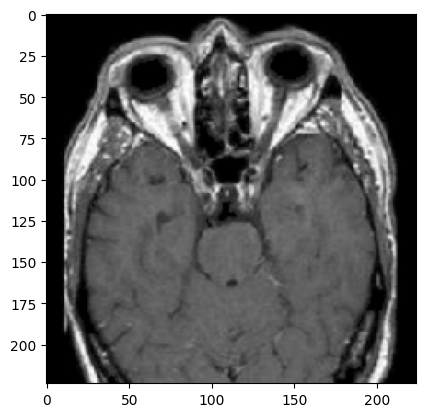

In [ ]:
#load and view the test image
test_image_path='/content/drive/MyDrive/4 classes/normal/N_1.jpg'
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [ ]:
#process the image
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array=img_array/255.0

In [ ]:
#interprete the results
prediction=model.predict(img_array)
ind=np.argmax(prediction)
print(class_names[ind])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
normal
